# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 15.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "mohamadashrafsalama"
kaggle_key = "208e8e184479ef9baadcaa70576f427f"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 47.8MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [7]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.loc[:, "datetime"] = pd.to_datetime(train.loc[:, "datetime"])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.loc[:, "datetime"] = pd.to_datetime(test.loc[:, "datetime"])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.loc[:, "datetime"] = pd.to_datetime(submission.loc[:, "datetime"])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [11]:
#df=train.drop(train.loc[:, 'casual':'registered'].columns, axis=1)
#df.head()

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
predictor = TabularPredictor(
    label="count", problem_type="regression", eval_metric="root_mean_squared_error",learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
)

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20221019_155045/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 600s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20221019_155045/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.15
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    10886
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 11
INFO:autogluon.tabular.learner.default_learner:Label Column: count
INFO:autogluon.tabular.

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.112639      16.291162  561.239776                0.000901           0.284765            3       True         14
1   RandomForestMSE_BAG_L2  -53.397782      12.867851  422.820957                0.728996          31.220338            2       True         12
2          LightGBM_BAG_L2  -55.318578      12.397111  415.764028                0.258256          24.163408            2       True         11
3          CatBoost_BAG_L2  -55.650956      12.211443  452.484448                0.072587          60.883828            2       True         13
4        LightGBMXT_BAG_L2  -60.358510      15.230421  444.687437                3.091566          53.086818            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.104553    0.034691         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

In [14]:
performance = predictor.evaluate(train)

INFO:autogluon.tabular.learner.abstract_learner:Evaluation: root_mean_squared_error on test data: -79.39253023715388
INFO:autogluon.tabular.learner.abstract_learner:	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
INFO:autogluon.tabular.learner.abstract_learner:Evaluations on test data:
INFO:autogluon.tabular.learner.abstract_learner:{
    "root_mean_squared_error": -79.39253023715388,
    "mean_squared_error": -6303.173857457392,
    "mean_absolute_error": -53.52156348459131,
    "r2": 0.8078903859025217,
    "pearsonr": 0.9372152255000094,
    "median_absolute_error": -30.449039340019226
}


### Create predictions from test dataset

In [15]:
predictions = predictor.predict(test)
predictions.head()

0    24.167007
1    42.348129
2    46.329800
3    49.949379
4    52.434437
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [16]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      101.092064
std        89.923691
min         3.026036
25%        20.810734
50%        64.523613
75%       166.938309
max       365.003265
Name: count, dtype: float64

In [17]:
# How many negative values do we have?
c=0
for i in predictions:
    if i<0:
        c=c+1
print (c)
        

0


In [18]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [19]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)
submission.head()

,datetime,count
0,2011-01-20 00:00:00,24.167007
1,2011-01-20 01:00:00,42.348129
2,2011-01-20 02:00:00,46.329800
3,2011-01-20 03:00:00,49.949379
4,2011-01-20 04:00:00,52.434437


In [20]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "second raw submission"

100% 188k/188k [00:01<00:00, 104kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [21]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2022-10-19 16:02:27  second raw submission              complete  1.78585      1.78585       
submission.csv               2022-10-19 13:46:17  second raw submission              complete  1.80736      1.80736       
submission_new_hpo.csv       2022-10-19 13:02:03  new features with hyperparameters  complete  0.69897      0.69897       
submission_new_hpo.csv       2022-10-19 13:01:16  new features with hyperparameters  complete  0.69897      0.69897       


#### Initial score of `1.7`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

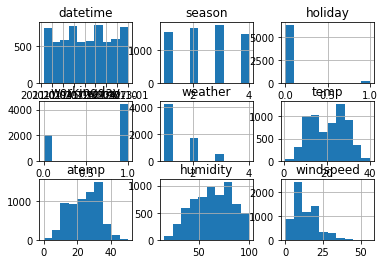

In [22]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
test.hist();

In [23]:
df=train.drop(train.loc[:, 'casual':'registered'].columns, axis=1)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [24]:
# create a new feature
df['year'] =df.datetime.dt.year
df['month'] =df.datetime.dt.month
df['day'] =df.datetime.dt.month
df['hour']=df.datetime.dt.hour
test['year'] =df.datetime.dt.year
test['month'] =df.datetime.dt.month
test['day'] =df.datetime.dt.month
test['hour']=test.datetime.dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [25]:
df["season"] =df["season"].astype("category")
df["weather"] =df["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [26]:
# View are new feature
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


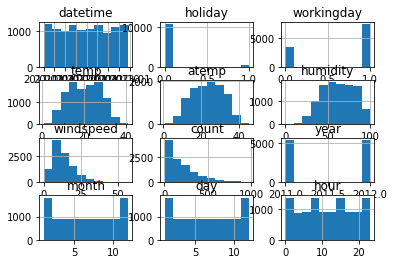

In [27]:
# View histogram of all features again now with the hour feature
df.hist();

## Step 5: Rerun the model with the same settings as before, just with more features

In [28]:
predictor_new_features = TabularPredictor(
    label="count", problem_type="regression", eval_metric="root_mean_squared_error"
).fit(
    train_data=df,
    time_limit=600,
    presets="best_quality",
)

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20221019_160232/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 600s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20221019_160232/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.15
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    10886
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 13
INFO:autogluon.tabular.learner.default_learner:Label Column: count
INFO:autogluon.tabular.

In [29]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.216484      20.713231  529.334850                0.001559           0.300535            3       True         14
1          LightGBM_BAG_L2  -30.470339      19.775391  423.019513                0.364212          27.338360            2       True         11
2          CatBoost_BAG_L2  -30.629597      19.580380  472.391987                0.169201          76.710834            2       True         13
3        LightGBMXT_BAG_L2  -31.246053      20.178260  424.985121                0.767080          29.303968            2       True         10
4   RandomForestMSE_BAG_L2  -31.759489      20.185057  432.264633                0.773878          36.583480            2       True         12
5      WeightedEnsemble_L2  -32.216682      18.127657  351.885173         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.46429179862833,
  'LightGBM_BAG_L1': -33.91758184996628,
  'RandomForestMSE_BAG_L1': -38.364

In [30]:
# Remember to set all negative values to zero
predicted_new_features=predictor_new_features.predict(test)
predicted_new_features

0        15.756428
1        11.165083
2        10.879782
3         9.315133
4         8.049507
           ...    
6488    307.083069
6489    207.050476
6490    153.411438
6491    107.721268
6492     72.595657
Name: count, Length: 6493, dtype: float32

In [31]:
predicted_new_features[predicted_new_features < 0] = 0

In [32]:
performance = predictor_new_features.evaluate(df)

INFO:autogluon.tabular.learner.abstract_learner:Evaluation: root_mean_squared_error on test data: -16.86169644688299
INFO:autogluon.tabular.learner.abstract_learner:	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
INFO:autogluon.tabular.learner.abstract_learner:Evaluations on test data:
INFO:autogluon.tabular.learner.abstract_learner:{
    "root_mean_squared_error": -16.86169644688299,
    "mean_squared_error": -284.31680706682647,
    "mean_absolute_error": -10.497112795488812,
    "r2": 0.9913345255386834,
    "pearsonr": 0.9963765819840623,
    "median_absolute_error": -6.32663631439209
}


In [33]:
# Same submitting predictions
submission_new_features=submission
submission_new_features["count"] = predicted_new_features
submission_new_features.to_csv("submission_new_features2.csv", index=False)
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,15.756428
1,2011-01-20 01:00:00,11.165083
2,2011-01-20 02:00:00,10.879782
3,2011-01-20 03:00:00,9.315133
4,2011-01-20 04:00:00,8.049507


In [34]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features 2"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/kaggle/cli.py", line 67, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 562, in competition_submit_cli
    competition, quiet)
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 513, in competition_submit
    content_length=os.path.getsize(file_name),
  File "/usr/lib/python3.7/genericpath.py", line 50, in getsize
    return os.stat(filename).st_size
FileNotFoundError: [Errno 2] No such file or directory: 'submission_new_features.csv'


In [35]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2022-10-19 16:02:27  second raw submission              complete  1.78585      1.78585       
submission.csv               2022-10-19 13:46:17  second raw submission              complete  1.80736      1.80736       
submission_new_hpo.csv       2022-10-19 13:02:03  new features with hyperparameters  complete  0.69897      0.69897       
submission_new_hpo.csv       2022-10-19 13:01:16  new features with hyperparameters  complete  0.69897      0.69897       


#### New Score of `1.7`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [36]:

#less time , 'light'
import autogluon.core as ag


batch_size = 8
lr = ag.Categorical(1e-2, 1e-3)


hyperparameters={'model': 'WeightedEnsemble_L3'   , 'batch_size': batch_size, 'lr': lr, 'epochs': 2}



predictor_new_hpo = TabularPredictor(
    label="count", problem_type="regression", eval_metric="root_mean_squared_error"
).fit(
    train_data=df,
    time_limit=120,
    hyperparameter_tune_kwargs={'num_trials': 2},
    #hyperparameters=hyperparameters,
    presets="best_quality",
)

Level 25:autogluon.common.utils.utils:No path specified. Models will be saved in: "AutogluonModels/ag-20221019_161430/"
INFO:autogluon.tabular.predictor.predictor:Presets specified: ['best_quality']
INFO:autogluon.tabular.predictor.predictor:Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ... Time limit = 120s
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "AutogluonModels/ag-20221019_161430/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.15
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    10886
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 13
INFO:autogluon.tabular.learner.default_learner:Label Column: count
INFO:autogluon.tabular.

In [37]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  LightGBMLarge_BAG_L1 -34.212687       3.179831  56.927339                3.179831          56.927339            1       True          1
1   WeightedEnsemble_L2 -34.212687       3.180693  56.935125                0.000862           0.007786            2       True          2
2  LightGBMLarge_BAG_L2 -36.303864       3.409912  82.282263                0.230081          25.354924            2       True          3
3   WeightedEnsemble_L3 -36.303864       3.410917  82.288245                0.001004           0.005982            3       True          4
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel'}
Bagging used: True  (with 8 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)
Feature Metadata (Processed):
(raw dtype, sp

{'model_types': {'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMLarge_BAG_L1': -34.212687273761865,
  'WeightedEnsemble_L2': -34.212687273761865,
  'LightGBMLarge_BAG_L2': -36.30386417794699,
  'WeightedEnsemble_L3': -36.30386417794699},
 'model_best': 'WeightedEnsemble_L2',
 'model_paths': {'LightGBMLarge_BAG_L1': 'AutogluonModels/ag-20221019_161430/models/LightGBMLarge_BAG_L1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20221019_161430/models/WeightedEnsemble_L2/',
  'LightGBMLarge_BAG_L2': 'AutogluonModels/ag-20221019_161430/models/LightGBMLarge_BAG_L2/',
  'WeightedEnsemble_L3': 'AutogluonModels/ag-20221019_161430/models/WeightedEnsemble_L3/'},
 'model_fit_times': {'LightGBMLarge_BAG_L1': 56.92733883857727,
  'WeightedEnsemble_L2': 0.007786273956298828,
  'LightGBMLarge_BAG_L2': 25.35492396

In [38]:
# Remember to set all negative values to zero
predicted_new_hpo=predictor_new_hpo.predict(test)

In [39]:
performance = predictor_new_hpo.evaluate(df)

INFO:autogluon.tabular.learner.abstract_learner:Evaluation: root_mean_squared_error on test data: -10.542659920232117
INFO:autogluon.tabular.learner.abstract_learner:	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
INFO:autogluon.tabular.learner.abstract_learner:Evaluations on test data:
INFO:autogluon.tabular.learner.abstract_learner:{
    "root_mean_squared_error": -10.542659920232117,
    "mean_squared_error": -111.14767819366867,
    "mean_absolute_error": -7.129386648493295,
    "r2": 0.9966124149438852,
    "pearsonr": 0.9983921042064191,
    "median_absolute_error": -4.775001525878906
}


In [40]:
# Same submitting predictions

predicted_new_hpo[predicted_new_hpo < 0] = 0
submission_new_hpo=submission
submission_new_hpo["count"] = predicted_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,15.396031
1,2011-01-20 01:00:00,0.000000
2,2011-01-20 02:00:00,0.000000
3,2011-01-20 03:00:00,2.092893
4,2011-01-20 04:00:00,2.115556


In [41]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 135kB/s]
Successfully submitted to Bike Sharing Demand

In [42]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-10-19 16:16:34  new features with hyperparameters  complete  0.51810      0.51810       
submission.csv               2022-10-19 16:02:27  second raw submission              complete  1.78585      1.78585       
submission.csv               2022-10-19 13:46:17  second raw submission              complete  1.80736      1.80736       
submission_new_hpo.csv       2022-10-19 13:02:03  new features with hyperparameters  complete  0.69897      0.69897       


#### New Score of `0.52141`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

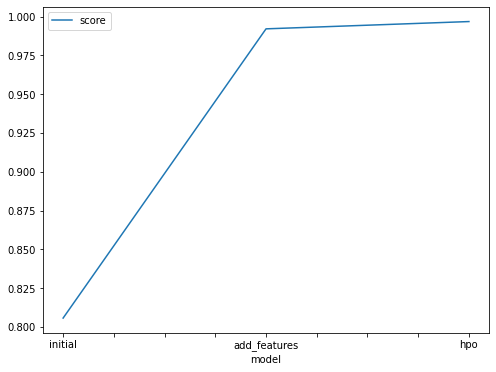

In [43]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [0.8056497264183021,0.9921612891572783, 0.9968618955042342]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

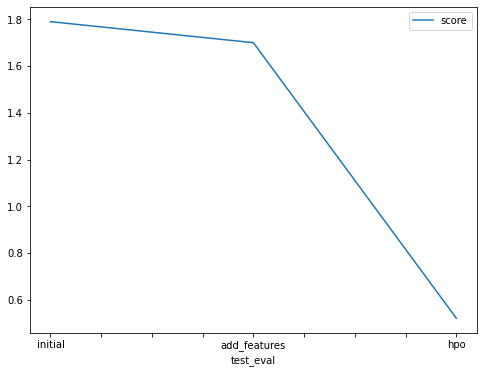

In [44]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79, 1.7,0.52141       ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [45]:
from pickle import NONE
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ['defult', 'defult', '120 second'],
    "hpo2": ['defult', 'defult', 'defult'],
    "hpo3": ['NONE', 'NONE', '''hyperparameter_tune_kwargs=True,
    hyperparameters='light'''],
    "score": [1.79, 1.7,0.52141       ]
})

,model,hpo1,hpo2,hpo3,score
0,initial,defult,defult,NONE,1.79000
1,add_features,defult,defult,NONE,1.70000
2,hpo,120 second,defult,"hyperparameter_tune_kwargs=True,\n hyperparameters='light",0.52141
